In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Introduction

This is a very basic analysis using pandas to see whether Fullerton weather falls into the comfort range or not.

In [2]:
df = pd.read_csv("fullerton-hourly.csv", skiprows=2)
column_names = ['month', 'day', 'hour', 'dry bulb', 'wet bulb', 'humidity', 'wind speed', 'wind direction', 'unnamed']
df.columns = column_names

grouped_new = df.groupby('month').mean()
grouped_new

del df['unnamed']
del df['wind direction']
del df['wind speed']

df

jan = df[df['month']==1].groupby('hour').mean()

jan

,month,day,dry bulb,wet bulb,humidity
hour,,,,,
1,1,16,49.959355,45.962043,74.322581
2,1,16,49.651613,45.658602,74.516129
3,1,16,49.715484,45.585377,73.903226
4,1,16,49.593548,45.398925,73.774194
5,1,16,49.303226,45.271506,74.645161
6,1,16,49.001290,44.997527,74.290323
7,1,16,48.925806,44.752688,73.161290
8,1,16,51.062581,46.148603,70.290323
9,1,16,55.312903,48.238173,60.774194


In [97]:
"""Will check if temperature is within the comfort range"""
def comfort(x):
    if x > 75 :
        return x - 75
    if x < 68:
        return x - 68
    else:
        return 0

comfort(60)

def hum(x):
    if x > 66 :
        return x - 75
    if x < 27:
        return x - 68
    else:
        return 0

comfort(60)
hum(70)

-5

In [103]:
feb = df[df['month']==2].groupby('hour').mean()


new = pd.DataFrame()
# new['jan'] = jan['dry bulb']
# new['feb'] = feb['dry bulb']

# months = ['jan', 'feb', 'mar','april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
i = 0
while (i < 13):
    d = df[df['month']==i].groupby('hour').mean()
    new[i] = d['dry bulb']
    i += 1
    
del new[0]

new
newdiff = new.applymap(lambda x: comfort(x))
newdiff
newdiff2.to_csv('newdiff2.csv')

In [102]:
new2 = pd.DataFrame()
# new['jan'] = jan['dry bulb']
# new['feb'] = feb['dry bulb']

# months = ['jan', 'feb', 'mar','april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
i = 0
while (i < 13):
    d2 = df[df['month']==i].groupby('hour').mean()
    new2[i] = d2['humidity']
    i += 1
    
del new2[0]

new2
newdiff2 = new2.applymap(lambda x: hum(x))
newdiff2

,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
1,-0.677419,0.678571,9.290323,3.366667,3.451613,8.433333,7.129032,8.354839,-2.133333,9.967742,3.400000,-0.096774
2,-0.483871,0.857143,9.258065,4.366667,4.709677,9.433333,8.322581,10.387097,-0.833333,9.096774,4.033333,0.000000
3,-1.096774,0.571429,11.387097,5.766667,6.096774,9.766667,9.193548,11.161290,-1.066667,9.967742,3.000000,1.387097
4,-1.225806,2.857143,10.741935,6.466667,5.870968,8.933333,10.645161,11.548387,-0.733333,12.483871,2.933333,2.612903
5,-0.354839,4.071429,9.903226,7.666667,6.032258,8.966667,11.419355,11.419355,-1.033333,11.838710,3.333333,2.000000
6,-0.709677,4.607143,11.193548,7.266667,3.677419,7.666667,9.612903,10.225806,-1.566667,12.483871,4.066667,3.161290
7,-1.838710,3.035714,9.774194,-0.133333,-0.032258,5.866667,3.645161,5.967742,-8.433333,10.709677,1.566667,2.161290
8,-4.709677,-2.642857,3.838710,-7.200000,-5.225806,0.700000,-3.677419,0.129032,0.000000,3.516129,-8.700000,-0.645161
9,0.000000,-8.000000,-3.516129,0.000000,0.000000,-6.066667,0.000000,-6.967742,0.000000,-1.774194,0.000000,0.000000


In [92]:
column_names = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug','sept', 'oct', 'nov', 'dec']
newdiff.columns = column_names



In [93]:
newdiff[[1]]

,feb
hour,
1,-13.905000
2,-14.522143
3,-14.425714
4,-15.235714
5,-15.557143
6,-16.007143
7,-15.814286
8,-12.600000
9,-9.578571


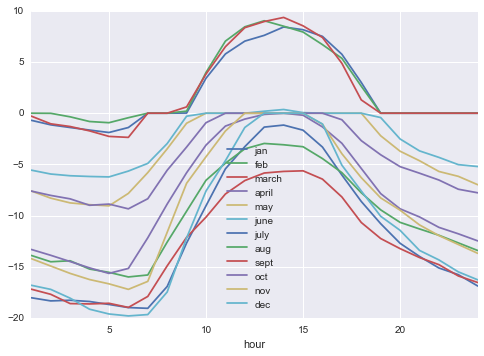

In [94]:
newdiff = newdiff
newdiff.plot()

In [30]:
mar = df[df['month']==3].groupby('hour').mean()

In [186]:
april = df[df['month']==4].groupby('hour').mean()

In [187]:
may = df[df['month']==5].groupby('hour').mean()

In [188]:
jun = df[df['month']==6].groupby('hour').mean()


In [189]:
jul = df[df['month']==7].groupby('hour').mean()

In [190]:
aug = df[df['month']==8].groupby('hour').mean()

In [191]:
sept =df[df['month']==9].groupby('hour').mean()

In [192]:
nov = df[df['month']==10].groupby('hour').mean()

In [193]:
dec = df[df['month']==11].groupby('hour').mean()

In [164]:
dec = df[df['month']==12].groupby('hour').mean()